### Name: Itunuoluwa Abidoye

### Car Price Prediction with Artificial Intelligence

In [1]:
#Importing my Libaries needed for the execution of the solution
import csv
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# my error-handling and my dataset loading opening

csv_path = "./car_sales_data.csv"

try:
    carsales_df = pd.read_csv(csv_path) # using Pandas to read in my file 
    #carsales_df
except FileNotFoundError as not_found: # File not found error 
    print(f"The file at path '{csv_path}' could not be found.")
except IOError as opening_error:
    print(f"An error occurred while trying to open the file: {opening_error}")
except Exception as exception:
    print(f"An unexpected error occurred: {exception}")

In [3]:
# load my dataset into the file
carsales_df

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101
...,...,...,...,...,...,...,...
49995,BMW,M5,5.0,Petrol,2018,28664,113006
49996,Toyota,Prius,1.8,Hybrid,2003,105120,9430
49997,Ford,Mondeo,1.6,Diesel,2022,4030,49852
49998,Ford,Focus,1.0,Diesel,2016,26468,23630


In [4]:
#Observing the dataset

carsales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


Text(0.5, 1.0, 'Graph Plot for Mileage VS Price')

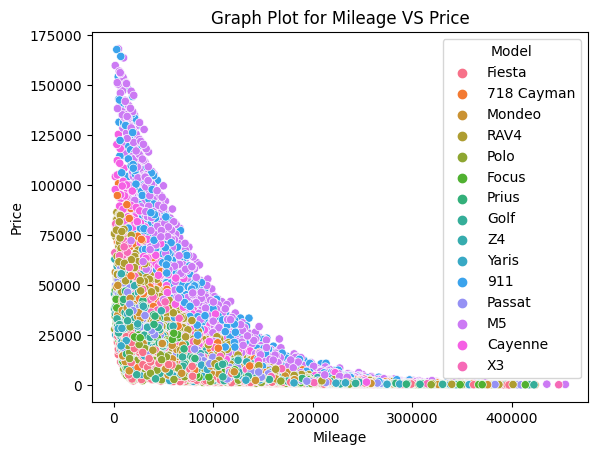

In [5]:
# ploting Mileage and Price graph
sns.scatterplot(data = carsales_df, x = "Mileage", y = "Price", hue = "Model")
plt.title(f"Graph Plot for Mileage VS Price")


Text(0.5, 1.0, 'Graph Plot for Year of manufacture VS Price')

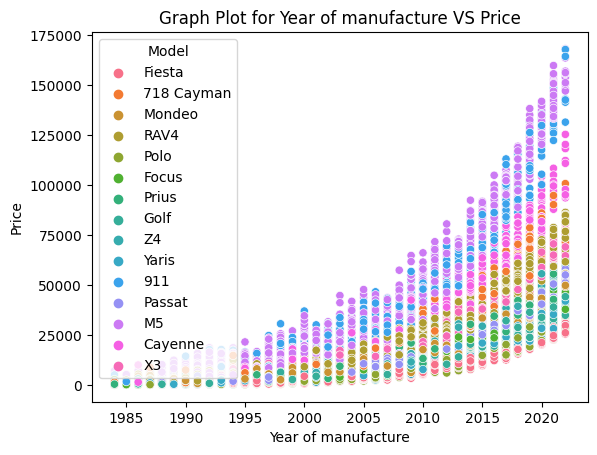

In [6]:
# ploting Year of manufacture and Price graph
sns.scatterplot(data = carsales_df, x = "Year of manufacture", y = "Price", hue = "Model")
plt.title(f"Graph Plot for Year of manufacture VS Price")


Text(0.5, 1.0, 'Graph Plot for Engine size VS Price')

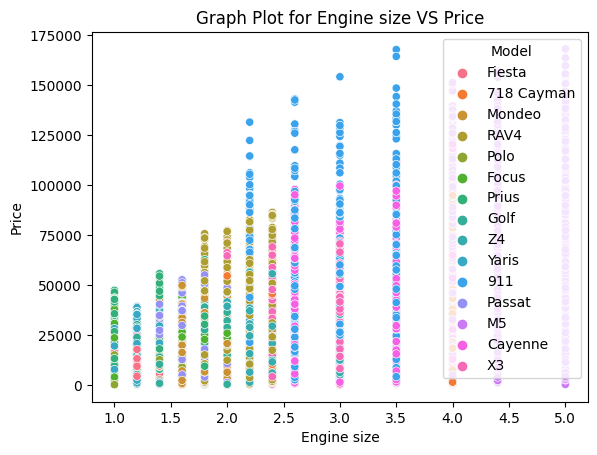

In [7]:
# ploting Engine size and Price graph
sns.scatterplot(data = carsales_df, x = "Engine size", y = "Price", hue = "Model")
plt.title(f"Graph Plot for Engine size VS Price")


Text(0.5, 1.0, 'Graph Plot for Fuel type VS Price')

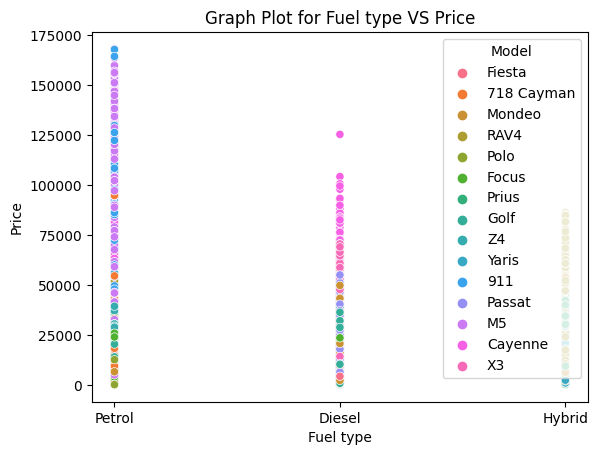

In [8]:
# ploting Fuel type and Price graph
sns.scatterplot(data = carsales_df, x = "Fuel type", y = "Price", hue = "Model")
plt.title(f"Graph Plot for Fuel type VS Price")


Text(0.5, 1.0, 'Graph Plot for Manufacturer VS Price')

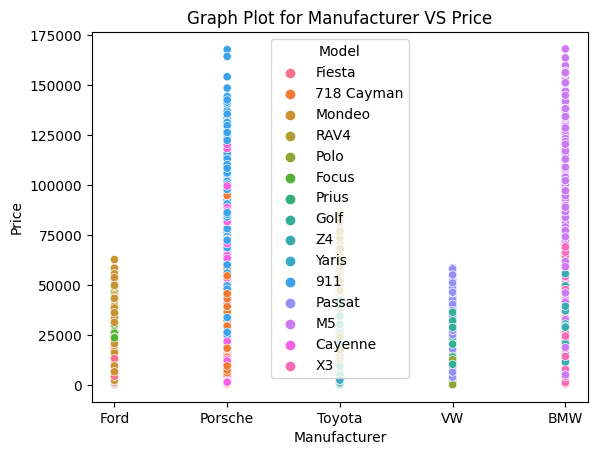

In [9]:
# ploting Fuel type and Price graph
sns.scatterplot(data = carsales_df, x = "Manufacturer", y = "Price", hue = "Model")
plt.title(f"Graph Plot for Manufacturer VS Price")


## Section 1A. 
Compare regression models that predict the price of a car based on a single
numerical input feature. Based on your results, which numerical variable in the
dataset is the best predictor for a car’s price, and why? For each numerical input feature, is the price better fit by a linear model or by a non-linear (e.g. polynomial)model?

## Numeric Models - Linear model:  Millage, Year of Manufacture, Engine Size

## Millage - Linear model

In [10]:
#Function for Simple linear Regression model for Price vs Mileage
def predictLinear(x,x_name):
    
    y = carsales_df["Price"]

    #reshape data of Mileage
    x = x.to_numpy().reshape(-1, 1)

    #split the data into a train and test set using the sklearn library 
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

    #apply standardisation by scaling the input feature(s) such that they have a mean of zero and a standard distribution of one

    scale = StandardScaler() #creating instance of the Standardscaler class

    scale.fit(x) #Fit this to the data in x 

    # transform the train and test datasets accordingly

    x_train_scaled = scale.transform(x_train)
    x_test_scaled = scale.transform(x_test)

    #x_train_scaled
    #x_test_scaled

    #create an instance of the model and fit it to the training data:

    carsales_linear = LinearRegression()
    carsales_linear.fit(x_train_scaled, y_train)

    #After fitting the model, print the gradient and intercept:
    gradient = carsales_linear.coef_[0]
    intercept = carsales_linear.intercept_
    print(f"gradient: {gradient:.3f} ")
    print(f"intercept: {intercept:.3f}")

    #Predict Car Price

    carsales_pred = carsales_linear.predict(x_test_scaled)
    #carsales_pred

    #calculate the evaluation metrics

    mae = mean_absolute_error(y_test, carsales_pred)
    mse = mean_squared_error(y_test, carsales_pred)
    rmse = np.sqrt(mse)
    R2 = r2_score(y_test, carsales_pred)

    # print evaluation metrics

    print(f"Simple linear Regression model Evaluation Metrics for {x_name}  vs Price")
    print(f"Mean Absolute error: {mae:.3f}")
    print(f"Mean Squared error: {mse:.3f}")
    print(f"Root Mean Squared error: {rmse:.3f}")
    print(f"R2: {R2:.3f}")


    #Add Line of Best Fit
    #create an array of x values spanning the range of Mileage found in the dataset (say, 0 to 50,000) and then predict the corresponding y values using the linear model like so
    x_fit = carsales_df[[x_name]]
    x_fit_scaled = scale.transform(x_fit)
    y_fit = carsales_linear.predict(x_fit_scaled)

    #Don’t forget to scale the array of x values before putting it into the model predictions! We can then add this fit as a straight line in the scatterplot like so

    sns.scatterplot(data = carsales_df, x = x_name,y = "Price")
    plt.plot(x_fit, y_fit)
    plt.title(f"Simple Linear Regression Model Plot: {x_name} VS Price")
    
    return x_test_scaled, x_train_scaled, y_train,y_test,scale

gradient: -10383.851 
intercept: 13814.105
Simple linear Regression model Evaluation Metrics for Mileage  vs Price
Mean Absolute error: 7964.785
Mean Squared error: 162468566.873
Root Mean Squared error: 12746.316
R2: 0.401


C:\Program Files\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


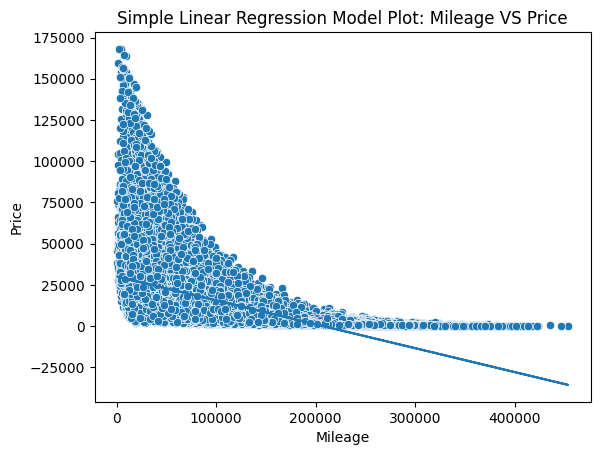

In [11]:
x_name = 'Mileage' #xlabel for graph
x = carsales_df["Mileage"] #x column from the dataset
x_test_scaled, x_train_scaled, y_train, y_test, scale = predictLinear(x,x_name)

## Year of manufacture - Linear model

gradient: 11715.456 
intercept: 13825.710
Simple linear Regression model Evaluation Metrics for Year of manufacture  vs Price
Mean Absolute error: 7031.039
Mean Squared error: 132678999.948
Root Mean Squared error: 11518.637
R2: 0.511


C:\Program Files\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


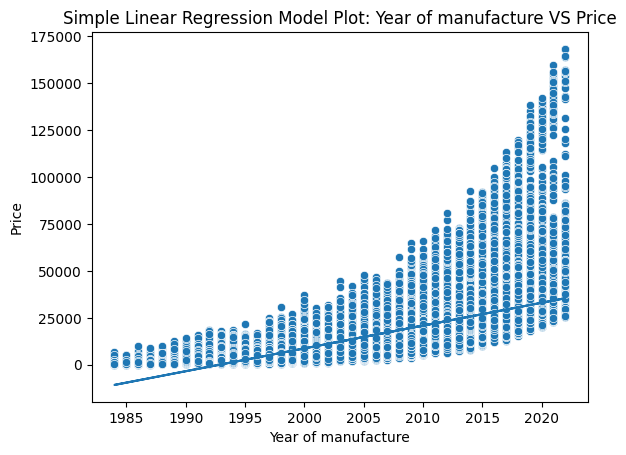

In [12]:
x1_name = 'Year of manufacture' #xlabel for graph
x1 = carsales_df["Year of manufacture"] #x column from the dataset

x1_test_scaled, x1_train_scaled, y_train, y_test, scale = predictLinear(x1,x1_name)
#nonLinear(x_test_scaled, x_train_scaled, y_train)


## Engine size - Linear model

gradient: 6538.709 
intercept: 13853.141
Simple linear Regression model Evaluation Metrics for Engine size  vs Price
Mean Absolute error: 10817.492
Mean Squared error: 230499154.453
Root Mean Squared error: 15182.199
R2: 0.151


C:\Program Files\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


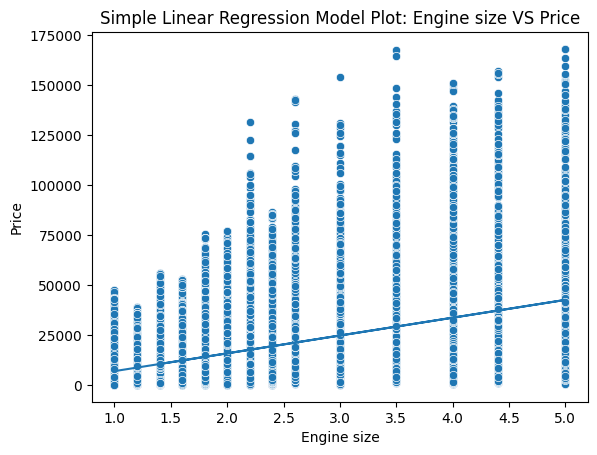

In [13]:
x2_name = 'Engine size' #xlabel for graph
x2 = carsales_df["Engine size"] #x column from the dataset

x2_test_scaled, x2_train_scaled, y_train, y_test, scale = predictLinear(x2,x2_name)


## Millage - Non-Linear model (Polynomial 2 degree)

In [14]:
#fit a polynomial regression model of degree 2 (i.e. a quadratic model).

from sklearn.preprocessing import PolynomialFeatures

def nonLinear(x_test_scaled, x_train_scaled, y_train, y_test,scale,x_name):
    #polynomial defination second degree
    poly = PolynomialFeatures(degree = 2, include_bias = False)
    
    x_poly = poly.fit_transform(x_train_scaled)
    x_test_poly = poly.transform(x_test_scaled)

    #poly regression model instance
    carsales_poly = LinearRegression()
    carsales_poly.fit(x_poly, y_train)

    #poly prediction
    carsales_predict_poly = carsales_poly.predict(x_test_poly)

    # intercept and coefficients

    print(f"intercept: {carsales_poly.intercept_:.3f} ")
    print("coefficients: ", carsales_poly.coef_)

    # The evaluation metrics
    mae_poly = mean_absolute_error(y_test, carsales_predict_poly)
    mse_poly = mean_squared_error(y_test, carsales_predict_poly)
    rmse_poly = np.sqrt(mse_poly)
    R2_poly = r2_score(y_test, carsales_predict_poly)

    # Print evaluation metrics
    print(f"Polynomial Degree 2 Regression model Evaluation Metrics for {x_name} vs Price")
    print(f"Mean Absolute error: {mae_poly:.3f}")
    print(f"Mean Squared error: {mse_poly:.3f}")
    print(f"Root Mean Squared error: {rmse_poly:.3f}")
    print(f"R2 score: {R2_poly:.3f}")

    #Polynomial graph
    #x_fit = np.arange(0, 500000, 1).reshape(-1, 1)
    #x_poly_fit = carsales_df[[x_name]]
    #x_poly_fit_scaled = scale.transform(x_poly_fit)
    #x_fit_transform = poly.fit_transform(x_poly_fit_scaled)
    #y_poly_fit = carsales_poly.predict(x_fit_transform)

    #sns.scatterplot(data = carsales_df, x = x_name,y = "Price")
    #plt.plot(x_poly, y_poly_fit)
    #plt.title(f"Polynomial Regression Model Plot: {x_name} VS Price") 


## Milleage - Non-Linear model (Polynomial 2 degree)

In [15]:
# Milleage Polynomial
nonLinear(x_test_scaled, x_train_scaled, y_train, y_test,scale,x_name)

intercept: 9325.301 
coefficients:  [-13608.66073765   4484.59053514]
Polynomial Degree 2 Regression model Evaluation Metrics for Mileage vs Price
Mean Absolute error: 6409.912
Mean Squared error: 129620312.163
Root Mean Squared error: 11385.092
R2 score: 0.522


## Year of Manufacture - Non-Linear model (Polynomial 2 degree)

In [16]:
# Year of Manufacture Polynomial
nonLinear(x1_test_scaled, x1_train_scaled, y_train, y_test,scale,x2_name)

intercept: 8542.972 
coefficients:  [12043.66326258  5285.35400178]
Polynomial Degree 2 Regression model Evaluation Metrics for Engine size vs Price
Mean Absolute error: 5387.109
Mean Squared error: 105993894.202
Root Mean Squared error: 10295.334
R2 score: 0.609


## Engine size - Non-Linear model (Polynomial 2 degree)

In [17]:
# Engine Size Polynomial
nonLinear(x2_test_scaled, x2_train_scaled, y_train, y_test,scale,x1_name)

intercept: 13614.558 
coefficients:  [6045.42772837  236.02040276]
Polynomial Degree 2 Regression model Evaluation Metrics for Year of manufacture vs Price
Mean Absolute error: 10807.262
Mean Squared error: 230326165.999
Root Mean Squared error: 15176.500
R2 score: 0.151


## Section 1b. 
Consider regression models that take multiple numerical variables as input features to predict the price of a car. Does the inclusion of multiple input features improve the accuracy of the model’s prediction compared to the single-input feature models that you explored in part (a)?


In [18]:
# Multiple input features to compare multiple-linear regression model
feature_names = ["Mileage", "Engine size", "Year of manufacture"]
x_multi = carsales_df[feature_names]

#split into trained and test
x_multi_train, x_multi_test = train_test_split(x_multi, test_size= 0.2, random_state = 42)

scale.fit(x_multi)

x_multi_train_scaled = scale.transform(x_multi_train)
x_multi_test_scaled = scale.transform(x_multi_test)

# Linear Regression
carsales_multi = LinearRegression()
carsales_multi.fit(x_multi_train_scaled, y_train)

# Gradient and intercept
gradient_multi = carsales_multi.coef_[0]
intercept_multi = carsales_multi.intercept_

print("Multiple-linear regression model")
print(f"gradient: {gradient_multi:.3f}")
print(f"intercept: {intercept_multi:.3f}")

#Predict life expentancy
carsales_multi_pred = carsales_multi.predict(x_multi_test_scaled)
carsales_multi_pred

# the evaluation metrics
mae_multi = mean_absolute_error(y_test, carsales_multi_pred)
mse_multi = mean_squared_error(y_test, carsales_multi_pred)
rmse_multi = np.sqrt(mse_multi)
R2_multi = r2_score(y_test, carsales_multi_pred)

print(f"Mean Absolute error: {mae_multi:.3f}")
print(f"Mean Squared error: {mse_multi:.3f}")
print(f"Root Mean Squared error: {rmse_multi:.3f}")
print(f"R2: {R2_multi:.3f}")


Multiple-linear regression model
gradient: -2722.981
intercept: 13819.002
Mean Absolute error: 6091.458
Mean Squared error: 89158615.760
Root Mean Squared error: 9442.384
R2: 0.671


## Section 1C
In parts (a) and (b) you only considered models that use the numerical variables from the dataset as inputs. However, there are also several categorical variables in the dataset that are likely to affect the price of the car. Now train a regression model that uses all relevant input variables (both categorical and numerical) to predict the price (e.g. a Random Forest Regressor model). Does this improve the accuracy of your results?

To perform for feature selection: we can’t pick at random so we use the corrleration heat map using the heatmap score we pick the features to train the model.

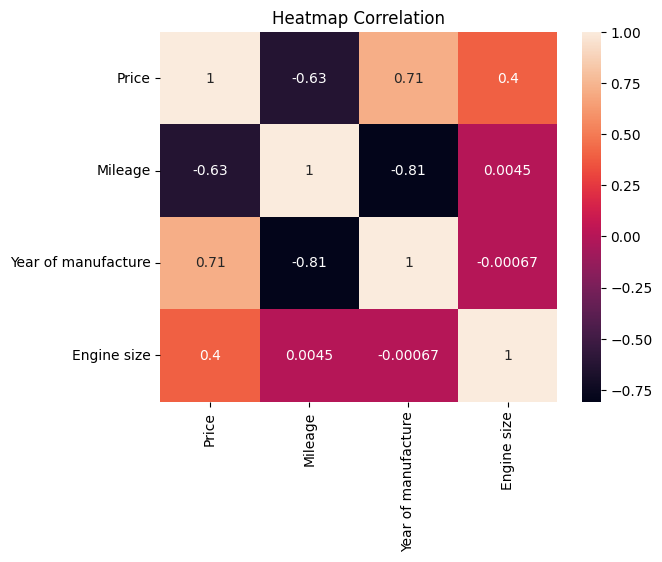

In [19]:
# Define which variables we want to use to calculate the correlation␣ coefficients.
column_list = ["Price", "Mileage", "Year of manufacture", "Engine size"]
# Calculate the correlation coefficients, and then plot them
# using Seaborn's heatmap() function
sns.heatmap(carsales_df[column_list].corr(), annot = True)
plt.title("Heatmap Correlation")
plt.show()

## From the heamap corelation all relevant input variables are Millage, Year of Manufacture and Engine size with figures -0.63 , 0.71, 0.4 respectively

## Random forest model (with the 3 correlated input variables)

In [20]:
# Multiple input features for Random forest regression model
from sklearn import preprocessing 
from sklearn.ensemble import RandomForestRegressor

#instance of label encoder class 
label_encoder = preprocessing.LabelEncoder() 
  
# Input features 
multi_feature = ["Mileage", "Year of manufacture", "Engine size"]#"Fuel type", "Model", "Manufacturer"
x_multi_rforest = carsales_df[multi_feature]

#print(x_multi_rforest)

#random forest splitting
x_multi_rftrain, x_multi_rftest = train_test_split(x_multi_rforest, test_size= 0.2, random_state = 42)

#scale fitting
scale.fit(x_multi_rforest)

#scale transform
x_multi_train_rfscaled = scale.transform(x_multi_rftrain)
x_multi_test_rfscaled = scale.transform(x_multi_rftest)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_multi_train_rfscaled, y_train)
rf_pred = rf_model.predict(x_multi_test_rfscaled)

# the evaluation metrics

mae_rf_multi = mean_absolute_error(y_test, rf_pred)
mse_rf_multi = mean_squared_error(y_test, rf_pred)
rmse_rf_multi = np.sqrt(mse_rf_multi)
R2_rf_multi = r2_score(y_test, rf_pred)


print("Random forest regression model 1")
print(f"Mean Absolute error: {mae_rf_multi:.3f}")
print(f"Mean Squared error: {mse_rf_multi:.3f}")
print(f"Root Mean Squared error: {rmse_rf_multi:.3f}")
print(f"R2: {R2_rf_multi:.3f}")

Random forest regression model 1
Mean Absolute error: 2294.500
Mean Squared error: 20156062.711
Root Mean Squared error: 4489.550
R2: 0.926


## Using the 3 input (Mileage, Year of manufacture, Engine size) from the corelation we have 92% 

## Random forest model (using all the information as input variables)

In [21]:
# Multiple input features for Random forest regression model
from sklearn import preprocessing 

# Encoded labels in column 'species'. 

carsales_df['Model'] = label_encoder.fit_transform(carsales_df['Model'] ) 
carsales_df['Fuel type'] = label_encoder.fit_transform(carsales_df['Fuel type'] ) 
carsales_df['Manufacturer'] = label_encoder.fit_transform(carsales_df['Manufacturer'] ) 
multi_feature1 = ["Mileage", "Year of manufacture", "Fuel type", "Engine size", "Model", "Manufacturer"]
#multi_feature = ["Mileage", "Year of manufacture", "Engine size"]#"Fuel type", "Model", "Manufacturer"
x_multi_rforest1 = carsales_df[multi_feature1]

#print(x_multi_rforest1)

x_multi_rftrain1, x_multi_rftest1 = train_test_split(x_multi_rforest1, test_size= 0.2, random_state = 42)

scale.fit(x_multi_rforest1)

x_multi_train_rfscaled1 = scale.transform(x_multi_rftrain1)
x_multi_test_rfscaled1 = scale.transform(x_multi_rftest1)

# Random Forest Regressor
rf_model1 = RandomForestRegressor(random_state=42)
rf_model1.fit(x_multi_train_rfscaled1, y_train)
rf_pred1 = rf_model1.predict(x_multi_test_rfscaled1)

# the evaluation metrics
mae_rf_multi1 = mean_absolute_error(y_test, rf_pred1)
mse_rf_multi1 = mean_squared_error(y_test, rf_pred1)
rmse_rf_multi1 = np.sqrt(mse_rf_multi1)
R2_rf_multi1 = r2_score(y_test, rf_pred1)

#print("intercept: ", rf_model1.intercept_)
#print("coefficients: ", rf_model1.coef_)

print("Random forest regression model 2")
print(f"Mean Absolute error: {mae_rf_multi1:.3f}")
print(f"Mean Squared error: {mse_rf_multi1:.3f}")
print(f"Root Mean Squared error: {rmse_rf_multi1:.3f}")
print(f"R2: {R2_rf_multi1:.3f}")


Random forest regression model 2
Mean Absolute error: 333.272
Mean Squared error: 480136.153
Root Mean Squared error: 692.919
R2: 0.998


# Using the 6 input (Mileage,Fuel Type,Model, Year of manufacture, Engine size, Manufacture) from the coorelation we have 99.8% 

## Section D.
Develop an Artificial Neural Network (ANN) model to predict the price of a car based on all the available information from the dataset. How does its performance compare to the other supervised learning models that you have considered? Discuss your choices for the architecture of the neural network that you used, and describe how you tuned the hyperparameters in your model to achieve the best performance.

In [22]:
#Importing necessary libaries for the ANN model
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## Using all the available information from the dataset

In [23]:
carsales_df['Model'] = label_encoder.fit_transform(carsales_df['Model'] ) 
carsales_df['Fuel type'] = label_encoder.fit_transform(carsales_df['Fuel type'] ) 
carsales_df['Manufacturer'] = label_encoder.fit_transform(carsales_df['Manufacturer'] ) 

ann_feature = ["Mileage", "Year of manufacture", "Fuel type", "Engine size", "Model", "Manufacturer"]
#multi_feature = ["Mileage", "Year of manufacture", "Engine size"]#"Fuel type", "Model", "Manufacturer"
x_ann = carsales_df[ann_feature]
y_ann = carsales_df["Price"]

#split the data into a train and test set using the sklearn library 
x_ann_train, x_ann_test, y_ann_train, y_ann_test = train_test_split(x_ann, y_ann, test_size= 0.2, random_state = 42)

# Apply Scaling 

#Using the MinMaxScaler, means the input data is scaled such that they all have values between zero and one
scale_ann = MinMaxScaler()
scale_ann.fit(x_ann)
x_ann_train_scaled = scale_ann.transform(x_ann_train)
x_ann_test_scaled = scale_ann.transform(x_ann_test)



In [24]:
# Constructor Stage

# Building the neural network

#Importing the Keras libary to build my neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout

#Creating an Instance of a class for the basis of the model
model = Sequential()

# the first hidden layer:
model.add(Dense(units = 64, input_dim = (6), activation = "relu"))

# The units parameter specifies how many neurons are in this layer. For the first hidden
# layer, we need to specify the number of input dimensions using the input_dim parameter.
# we have 6 input features: (Mileage,Fuel Type,Model, Year of manufacture, Engine size, Manufacture)
# we therefore need to set inupt_dim = (6). Finally, the activation parameter
# allows us to specify which activation function to use in this layer.

# Specifying Dropout rate by 20% for the first hidden layer
model.add(Dropout(0.2))

#Now we can add the remaining layers, another hidden layer with 64 neurons and the output layer with 1 output, as follows:
model.add(Dense(units = 64, activation = "relu"))
model.add(Dense(units = 64, activation = "relu"))
model.add(Dense(units = 64, activation = "relu"))
model.add(Dense(units = 64, activation = "relu"))

#Output layer
model.add(Dense(units = 1, activation = "linear"))

#Print Model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 6

In [25]:
# compiling and training using Adams Optimizer with mean squared error
model.compile(optimizer="adam", loss='mean_squared_error', metrics='mean_squared_error')

#For this task, I trained the model for 200 epochs, 
# and used an Early Stopping criterion that monitors the Validation Loss with a patience of 20

In [26]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience = 20)

#You can then use this when you fit the model as follows:

history = model.fit(x = x_ann_train_scaled, y = y_ann_train,
batch_size = None, epochs = 200,
verbose = "auto", validation_split = 0.1,
callbacks = [early_stopping])

Epoch 1/200
1125/1125 [==============================] - 1s 869us/step - loss: 105558888.0000 - mean_squared_error: 105558888.0000 - val_loss: 20882292.0000 - val_mean_squared_error: 20882292.0000
Epoch 2/200
1125/1125 [==============================] - 1s 795us/step - loss: 24208804.0000 - mean_squared_error: 24208804.0000 - val_loss: 16220101.0000 - val_mean_squared_error: 16220101.0000
Epoch 3/200
1125/1125 [==============================] - 1s 767us/step - loss: 20782366.0000 - mean_squared_error: 20782366.0000 - val_loss: 14099010.0000 - val_mean_squared_error: 14099010.0000
Epoch 4/200
1125/1125 [==============================] - 1s 780us/step - loss: 19045962.0000 - mean_squared_error: 19045962.0000 - val_loss: 12723410.0000 - val_mean_squared_error: 12723410.0000
Epoch 5/200
1125/1125 [==============================] - 1s 767us/step - loss: 16941854.0000 - mean_squared_error: 16941854.0000 - val_loss: 11598390.0000 - val_mean_squared_error: 11598390.0000
Epoch 6/200
1125/1125 [

In [27]:
#Checking minimum and maximum value
carsales_df["Price"].min()
carsales_df["Price"].max()

168081

313/313 [==============================] - 0s 538us/step


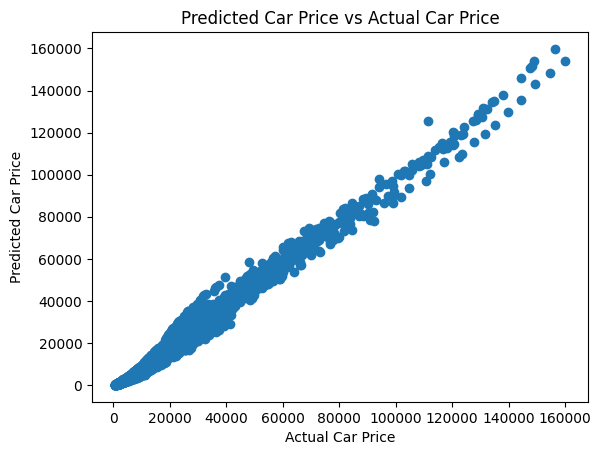

In [28]:
# Visualizing the result the model predicts

y_ann_pred = model.predict(x_ann_test_scaled)

plt.scatter( x = y_ann_pred, y= y_ann_test )
plt.title("Predicted Car Price vs Actual Car Price")
plt.xlabel("Actual Car Price")
plt.ylabel("Predicted Car Price")
plt.show()


In [29]:

# the ANN evaluation metrics
mae_ann_multi = mean_absolute_error(y_test, y_ann_pred)
mse_ann_multi = mean_squared_error(y_test, y_ann_pred)
rmse_ann_multi = np.sqrt(mse_ann_multi)
R2_ann_multi = r2_score(y_test, y_ann_pred)

# printing metrics
print("ANN Evaluation model 1")
print(f"Mean Absolute error: {mae_ann_multi:.3f}")
print(f"Mean Squared error: {mse_ann_multi:.3f}")
print(f"Root Mean Squared error: {rmse_ann_multi:.3f}")
print(f"R2: {R2_ann_multi:.3f}")

ANN Evaluation model 1
Mean Absolute error: 2367.301
Mean Squared error: 7529814.555
Root Mean Squared error: 2744.051
R2: 0.972


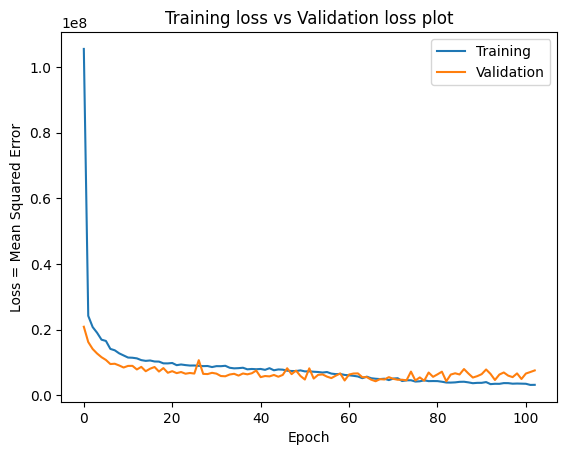

In [30]:
#  the history of the training and validation losses against the epoch plot

history_ann_df = pd.DataFrame(history.history)

# Training and validation loss versus epoch plot
plt.title("Training loss vs Validation loss plot")
plt.plot(history_ann_df["loss"], label = "Training")
plt.plot(history_ann_df["val_loss"], label = "Validation")
plt.legend()
# x and y labeling
plt.xlabel("Epoch")
plt.ylabel("Loss = Mean Squared Error")
plt.show()

#  Hyperparameter tuning adding 1 layer

In [31]:

#Creating an Instance of a class for the basis of the model
model1 = Sequential()

# This will be our model.
# Add the first hidden layer, with
# input_dim = 6, 64 units, and the
# ReLU activation function.
model1.add(Dense(units = 64, input_dim = (6), activation = "relu"))
# Add a dropout layer with a 20% dropout rate.
model1.add(Dropout(0.2))
# Second hidden layer with 64 units and
# the ReLU activation function.
model1.add(Dense(units = 64, activation = "relu"))
# Third hidden layer with 64 units and
# the ReLU activation function.
model1.add(Dense(units = 64, activation = "relu"))
model1.add(Dense(units = 64, activation = "relu"))
model1.add(Dense(units = 64, activation = "relu"))
model1.add(Dense(units = 64, activation = "relu"))

# The output layer, this will have 1 unit
# because we are predicting one value
# (the Price). Also, we will use the linear
# activation function, because this is a regression problem, predicting a
# continuous output variable.
model1.add(Dense(units = 1, activation = "linear"))
# Print a summary of the model
model1.summary()
# Compile the model using the Adam optimizer.
model1.compile(optimizer="adam", loss='mean_squared_error',metrics='mean_squared_error')
# Define the early stopping criterion, with a
# patience of 20.
early_stopping = EarlyStopping(monitor='val_loss', patience = 20)
# Train the model
history1 = model1.fit(x = x_ann_train_scaled , y = y_ann_train, batch_size = None, epochs= 200,
verbose = "auto", validation_split = 0.1, callbacks = [early_stopping])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                448       
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 64)               

313/313 [==============================] - 0s 531us/step
ANN Evaluation model 2
Mean Absolute error: 2680.830
Mean Squared error: 9117991.614
Root Mean Squared error: 3019.601
R2: 0.966


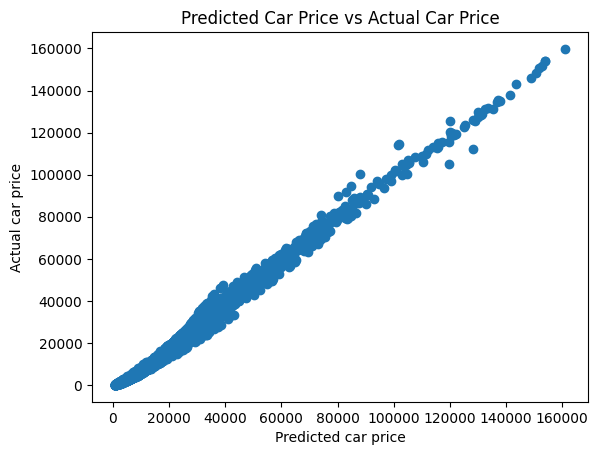

In [32]:
# Predicting the model outputs for the testing set
y_ann_pred1 = model1.predict(x_ann_test_scaled)

# The predicted vs actual values Plot
plt.scatter( x = y_ann_pred1, y= y_ann_test )
plt.title("Predicted Car Price vs Actual Car Price")
plt.xlabel("Predicted car price")
plt.ylabel("Actual car price")


# the evaluation metrics
mae_ann_multi1 = mean_absolute_error(y_test, y_ann_pred1)
mse_ann_multi1 = mean_squared_error(y_test, y_ann_pred1)
rmse_ann_multi1 = np.sqrt(mse_ann_multi1)
R2_ann_multi1 = r2_score(y_test, y_ann_pred1)

# printing evaluation metrics
print("ANN Evaluation model 2")
print(f"Mean Absolute error: {mae_ann_multi1:.3f}")
print(f"Mean Squared error: {mse_ann_multi1:.3f}")
print(f"Root Mean Squared error: {rmse_ann_multi1:.3f}")
print(f"R2: {R2_ann_multi1:.3f}")

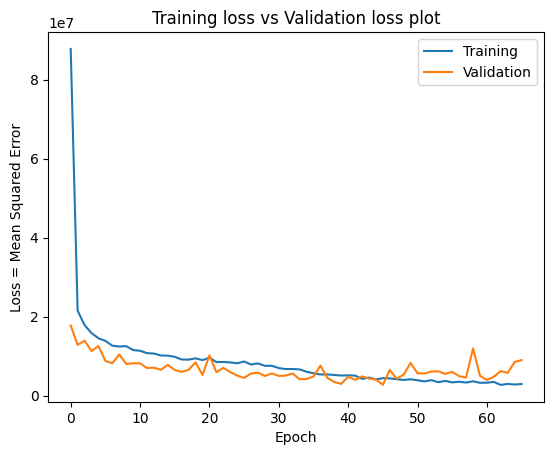

In [33]:

# Creating a pandas dataframe containing the history of the fitting
history_ann_df1 = pd.DataFrame(history1.history)

# Training and validation loss versus epoch plot
plt.title("Training loss vs Validation loss plot")
plt.plot(history_ann_df1["loss"], label = "Training")
plt.plot(history_ann_df1["val_loss"], label = "Validation")

# Add a legend to the plot.
plt.legend()
# x and y labeling
plt.xlabel("Epoch")
plt.ylabel("Loss = Mean Squared Error")
# Show the plot.
plt.show()

## ANN with a learning rate of 0.0001

In [34]:
from keras.optimizers import Adam

#Creating an Instance of a class for the basis of the model
model2 = Sequential()

# ReLU activation function.
model2.add(Dense(units = 64, input_dim = (6), activation = "relu"))
# Add a dropout layer with a 20% dropout rate.
model2.add(Dropout(0.2))
# Second hidden layer with 64 units and
# the ReLU activation function.
model2.add(Dense(units = 64, activation = "relu"))
# Third hidden layer with 64 units and
# the ReLU activation function.
model2.add(Dense(units = 64, activation = "relu"))
model2.add(Dense(units = 64, activation = "relu"))
model2.add(Dense(units = 64, activation = "relu"))
model2.add(Dense(units = 1, activation = "linear"))
# Print a summary of the model
model2.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                448       
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 64)                4160      
                                                                 
 dense_18 (Dense)            (None, 1)                

In [35]:
# learning_rate to 0.0001 here.
adam_optimizer = Adam(learning_rate = 0.0001)
# Compile the model using the Adam optimizer.
model2.compile(optimizer="adam", loss='mean_squared_error',metrics='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience = 20)

# Train the model
history2 = model2.fit(x = x_ann_train_scaled , y = y_ann_train, batch_size = None, epochs= 200,
verbose = "auto", validation_split = 0.1, callbacks = [early_stopping])


Epoch 1/200
1125/1125 [==============================] - 1s 868us/step - loss: 103681296.0000 - mean_squared_error: 103681296.0000 - val_loss: 22231038.0000 - val_mean_squared_error: 22231038.0000
Epoch 2/200
1125/1125 [==============================] - 1s 803us/step - loss: 24849336.0000 - mean_squared_error: 24849336.0000 - val_loss: 17508318.0000 - val_mean_squared_error: 17508318.0000
Epoch 3/200
1125/1125 [==============================] - 1s 810us/step - loss: 21266358.0000 - mean_squared_error: 21266358.0000 - val_loss: 14534382.0000 - val_mean_squared_error: 14534382.0000
Epoch 4/200
1125/1125 [==============================] - 1s 783us/step - loss: 19880318.0000 - mean_squared_error: 19880318.0000 - val_loss: 15643987.0000 - val_mean_squared_error: 15643987.0000
Epoch 5/200
1125/1125 [==============================] - 1s 791us/step - loss: 18637794.0000 - mean_squared_error: 18637794.0000 - val_loss: 12536982.0000 - val_mean_squared_error: 12536982.0000
Epoch 6/200
1125/1125 [

313/313 [==============================] - 0s 559us/step
ANN Evaluation model 3
Mean Absolute error: 2088.120
Mean Squared error: 5881353.961
Root Mean Squared error: 2425.150
R2: 0.978


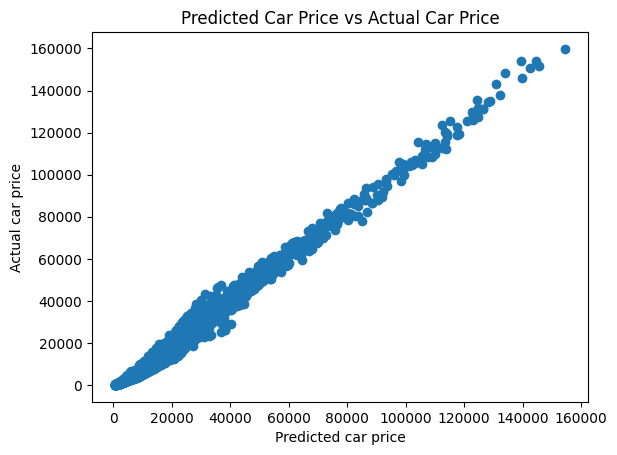

In [36]:

# Predict the model outputs for the testing set
y_ann_pred2 = model2.predict(x_ann_test_scaled)
# Plot the predicted vs actual values
plt.scatter( x = y_ann_pred2, y = y_ann_test )
plt.title("Predicted Car Price vs Actual Car Price")
plt.xlabel("Predicted car price")
plt.ylabel("Actual car price")


# the evaluation metrics
mae_ann_multi2 = mean_absolute_error(y_test, y_ann_pred2)
mse_ann_multi2 = mean_squared_error(y_test, y_ann_pred2)
rmse_ann_multi2 = np.sqrt(mse_ann_multi2)
R2_ann_multi2 = r2_score(y_test, y_ann_pred2)

# printing evaluation metrics

print("ANN Evaluation model 3")
print(f"Mean Absolute error: {mae_ann_multi2:.3f}")
print(f"Mean Squared error: {mse_ann_multi2:.3f}")
print(f"Root Mean Squared error: {rmse_ann_multi2:.3f}")
print(f"R2: {R2_ann_multi2:.3f}")

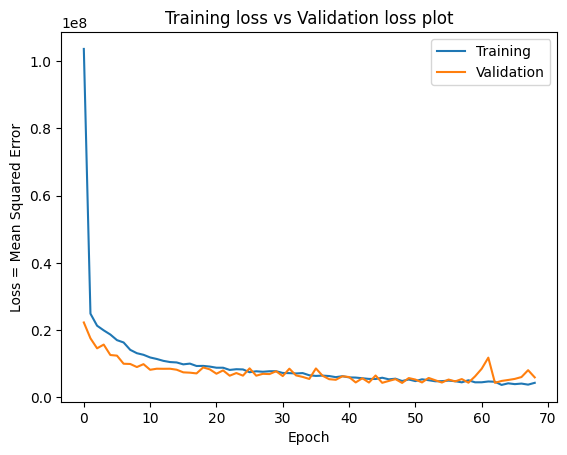

In [37]:
# Creating a pandas dataframe containing the history of the fitting
history_ann_df2 = pd.DataFrame(history2.history)

# Training and validation loss versus epoch plot
plt.title("Training loss vs Validation loss plot")
plt.plot(history_ann_df2["loss"], label = "Training")
plt.plot(history_ann_df2["val_loss"], label = "Validation")
plt.legend()
# x and y labeling
plt.xlabel("Epoch")
plt.ylabel("Loss = Mean Squared Error")
plt.show()

## ANN with dropout rate of 0.1 = 10%

In [38]:

#Creating an Instance of a class for the basis of the model
model3 = Sequential()

# ReLU activation function.
model3.add(Dense(units = 64, input_dim = (6), activation = "relu"))
# Add a dropout layer with a 10% dropout rate.
model3.add(Dropout(0.1))
# Second hidden layer with 64 units and
# the ReLU activation function.
model3.add(Dense(units = 64, activation = "relu"))
# Third hidden layer with 64 units and
# the ReLU activation function.
model3.add(Dense(units = 64, activation = "relu"))
model3.add(Dense(units = 64, activation = "relu"))
model3.add(Dense(units = 64, activation = "relu"))
model3.add(Dense(units = 1, activation = "linear"))
# Print a summary of the model
model3.summary()

# Compile the model using the Adam optimizer.
model3.compile(optimizer="adam", loss='mean_squared_error',metrics='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience = 20)

# Train the model
history3 = model3.fit(x = x_ann_train_scaled , y = y_ann_train, batch_size = None, epochs= 200,
verbose = "auto", validation_split = 0.1, callbacks = [early_stopping])



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 64)                448       
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 64)                4160      
                                                                 
 dense_21 (Dense)            (None, 64)                4160      
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 dense_23 (Dense)            (None, 64)                4160      
                                                                 
 dense_24 (Dense)            (None, 1)                

313/313 [==============================] - 0s 539us/step
ANN Evaluation model 4
Mean Absolute error: 1118.075
Mean Squared error: 2175148.228
Root Mean Squared error: 1474.838
R2: 0.992


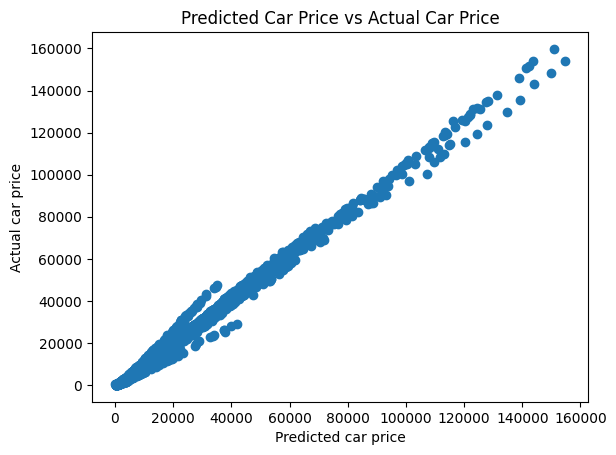

In [39]:


# Predict the model outputs for the testing set
y_ann_pred3 = model3.predict(x_ann_test_scaled)
# Plot the predicted vs actual values
plt.scatter( x = y_ann_pred3, y = y_ann_test )
plt.title("Predicted Car Price vs Actual Car Price")
plt.xlabel("Predicted car price")
plt.ylabel("Actual car price")


# the evaluation metrics
mae_ann_multi3 = mean_absolute_error(y_test, y_ann_pred3)
mse_ann_multi3 = mean_squared_error(y_test, y_ann_pred3)
rmse_ann_multi3 = np.sqrt(mse_ann_multi3)
R2_ann_multi3 = r2_score(y_test, y_ann_pred3)

# printing evaluation metrics
print("ANN Evaluation model 4")
print(f"Mean Absolute error: {mae_ann_multi3:.3f}")
print(f"Mean Squared error: {mse_ann_multi3:.3f}")
print(f"Root Mean Squared error: {rmse_ann_multi3:.3f}")
print(f"R2: {R2_ann_multi3:.3f}")

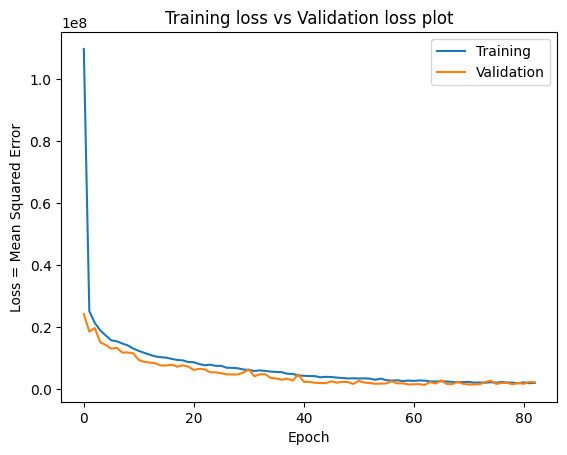

In [40]:
# Creating a pandas dataframe containing the history of the fitting
history_ann_df3 = pd.DataFrame(history3.history)

# Training and validation loss versus epoch plot
plt.title("Training loss vs Validation loss plot")
plt.plot(history_ann_df3["loss"], label = "Training")
plt.plot(history_ann_df3["val_loss"], label = "Validation")
plt.legend()
# x and y labeling
plt.xlabel("Epoch")
plt.ylabel("Loss = Mean Squared Error")
plt.show()

## f. Using K-Means Clustering 
f. Use the k-Means clustering algorithm to identify clusters in the car sales data. Consider different combinations of the numerical variables in the dataset to use as input features for the clustering algorithm. In each case, what is the optimal number of clusters (k) to use and why? Which combination of variables produces the best clustering results? Use appropriate evaluation metrics to support your conclusions.

In [41]:
# Using the Elbow Method to determine the clusters (k-Means) to use
import sklearn
from sklearn.cluster import KMeans # Importing KMean from the cluster libary
from sklearn.preprocessing import StandardScaler # Applying standardisation to re-scale the input features 
from sklearn.metrics import davies_bouldin_score, silhouette_score # Import the internal measures


In [42]:
# function for standardization 

def standardisationKMeans(x_knn_numerical,x_plot):
    # Scalling
    scale_knn = StandardScaler()
    scale_knn.fit(x_knn_numerical)
    numerical_scaled = scale_knn.transform(x_knn_numerical)

    inertia_knn = []
    # Define the range of values of k
    k_range_knn = range(1, 11)
    # Loop through the possible values of k
    for k in k_range_knn:
        # Initialise the model
        kmeans = KMeans(n_clusters = k, random_state = 42, n_init=1)
        # Fit the model to the scaled data
        kmeans.fit(numerical_scaled)
        # Record the inertia
        inertia_knn.append(kmeans.inertia_)

    # Use matplotlib to plot the inertia versus k
    plt.plot(k_range_knn, inertia_knn, 'bx-')

    # Label the axes
    plt.xlabel("Number of clusters")
    plt.ylabel("Inertia")
    plt.title(f"Elbow fit Plot for {x_plot} VS Price")
    
    # Show the figure
    plt.show()
    
    return numerical_scaled
    
# function for KMeans Clustering
def clusteringKMeans(n_clusters, numerical_scaled):
    
    kmeans_final = KMeans(n_clusters = 5, random_state = 42, n_init=1) #, n_init=1
    kmeans_final.fit(numerical_scaled)
    cluster_labels_pred = kmeans_final.predict(numerical_scaled)
    
    # Calculating the Davies Bouldin index and the Silhouette Coefficient for this model
    k_db_score = sklearn.metrics.davies_bouldin_score(numerical_scaled, cluster_labels_pred) #Davies Bouldin
    k_s_score = sklearn.metrics.silhouette_score(numerical_scaled, cluster_labels_pred) # Silhouette Coef

    print (f"Davies Bouldin Score is: {k_db_score:.3f}")
    print (f"Silhouette Score is: {k_s_score:.3f}")

    return cluster_labels_pred


## 1st Numerical combination: ["Mileage", "Price"] 

k-Means Category 1 Graph


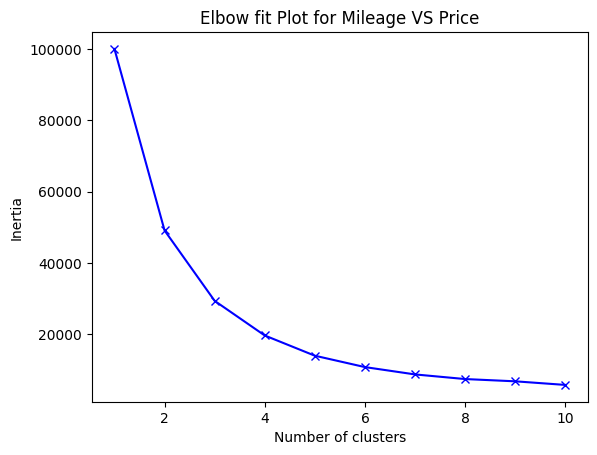

In [43]:
# Input features for numerical combinations of numerical inputs
x_plot = "Mileage"
knn_feature = ["Mileage", "Price"]
x_knn_numerical = carsales_df[knn_feature]

print("k-Means Category 1 Graph")
# Calling the standardization function
numerical_scaled = standardisationKMeans(x_knn_numerical,x_plot)


## After ploting the graph the elbow point for the numerical combinations inputs ["Mileage", "Price"] is 5

There is a sharp change in the gradient at k=2, however, the curve continues to flatten somewhat at k=5 too. I would therefore choose k=5 as the optimum number of clusters in this example

Davies Bouldin Score is: 0.648
Silhouette Score is: 0.453


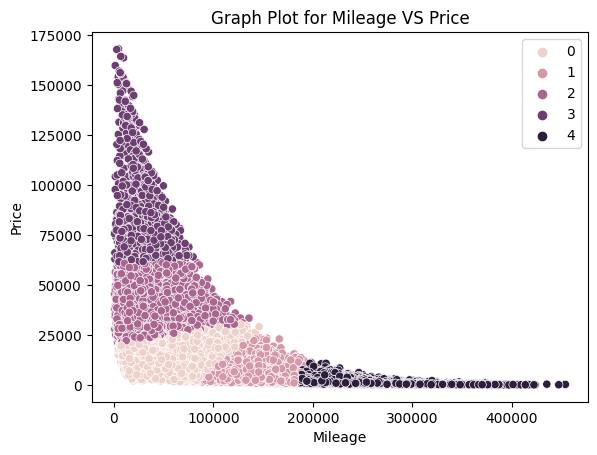

In [44]:
# After finding the elbow point perform the clustering operation
n_clusters = 5 #Elbow point k = 5 using the numerical inputs ["Mileage", "Price"]

cluster_labels_pred = clusteringKMeans(n_clusters, numerical_scaled)
sns.scatterplot(data = carsales_df, x = "Mileage", y = "Price", hue = cluster_labels_pred)
plt.title(f"Graph Plot for {x_plot} VS Price")
plt.show()



## 2nd Numerical combination: ["Year of manufacture", "Price"] 

k-Means Category 2 Graph


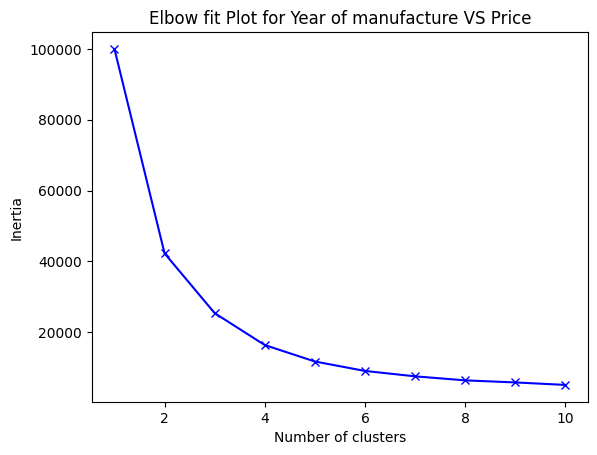

In [45]:
# Input features for year of manufacture and price
x1_plot = "Year of manufacture"
knn_feature1 = ["Year of manufacture",  "Price"]
x1_knn_numerical = carsales_df[knn_feature1]

print("k-Means Category 2 Graph")

# Calling the standardization function
numerical_scaled1 = standardisationKMeans(x1_knn_numerical,x1_plot)


Davies Bouldin Score is: 0.651
Silhouette Score is: 0.472


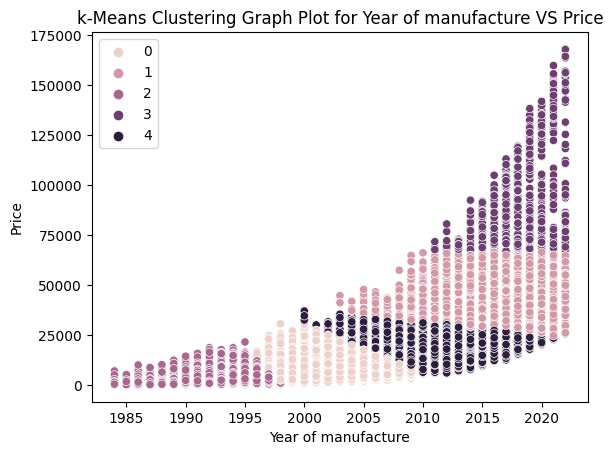

In [46]:
# After finding the elbow point perform the clustering operation
n1_clusters = 4 #Elbow point k = 4 using ["Year of manufacture", "Price"]

cluster_labels_pred = clusteringKMeans(n1_clusters, numerical_scaled1)
sns.scatterplot(data = carsales_df, x = "Year of manufacture", y = "Price", hue = cluster_labels_pred)
plt.title(f"k-Means Clustering Graph Plot for {x1_plot} VS Price")
plt.show()


## 3rd Numerical combination: ["Engine size", "Price"]


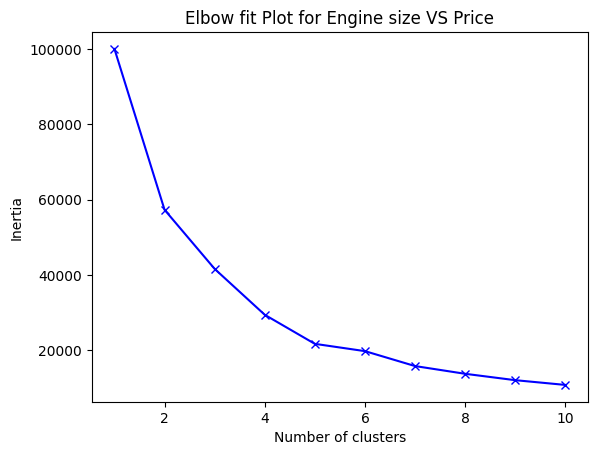

In [47]:
# Input features for Engine size and Price
x2_plot = "Engine size"
knn_feature2 = ["Engine size", "Price"]
x2_knn_numerical = carsales_df[knn_feature2]

#print("k-Means Category 3 Graph")

# Calling the standardization function
numerical_scaled2 = standardisationKMeans(x2_knn_numerical,x2_plot)



Davies Bouldin Score is: 0.755
Silhouette Score is: 0.432


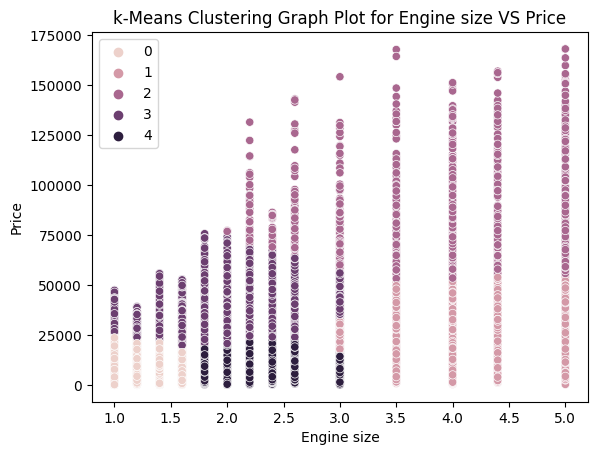

In [48]:
# After finding the elbow point perform the clustering operation
n2_clusters = 5 #Elbow point k = 5 using the numerical inputs [ "Engine size", "Price"]

cluster_labels_pred = clusteringKMeans(n2_clusters, numerical_scaled2)
sns.scatterplot(data = carsales_df, x = "Engine size", y = "Price", hue = cluster_labels_pred)
plt.title(f"k-Means Clustering Graph Plot for {x2_plot} VS Price")
plt.show()

## G. Compare the results of the k-Means clustering model from part (f) to at least one other clustering algorithm. Which algorithm produces the best clustering? Use suitable evaluation metrics to justify your answer.

## Hierarchical Clustering

In [49]:
# function for Clustering Agglomerative 
# Knowing our Elbow point we have discovered our K = 5 i.e n_clusters = 5

from sklearn.cluster import AgglomerativeClustering # Importing Agglomerative libary

def clusteringAGG(numerical_scaled):
    # Agglomerative clustering technique
    agg_model = AgglomerativeClustering(n_clusters = 5, linkage = 'complete')
    agg_labels_pred = agg_model.fit_predict(numerical_scaled)

    # Calculating the Davies Bouldin index and the Silhouette Coefficient for this model
    agg_db_score = sklearn.metrics.davies_bouldin_score(numerical_scaled, agg_labels_pred) #Davies Bouldin
    agg_s_score = sklearn.metrics.silhouette_score(numerical_scaled, agg_labels_pred) # Silhouette Coef

    print (f"Davies Bouldin Score is: {agg_db_score:.3f}")
    print (f"Silhouette Score is: {agg_s_score:.3f}")

    return agg_labels_pred

## Confirming the value of k for clustering for the Agglomerative

## Using the already scalled values as above: I will be using this to calculate for the Aggolometric and DBSCAN

## Numerical Scaled ["Mileage", "Price"]
## Numerical_Scaled 1 ["Year of manufacture",  "Price"]
## Numerical_Scaled 2 ["Engine size", "Price"]

## KMeans comparism with Agglomerative Clustering


In [50]:
# First Category ["Mileage", "Price"]

agg_labels_pred = clusteringAGG(numerical_scaled) 

Davies Bouldin Score is: 0.551
Silhouette Score is: 0.398


In [51]:
# Second Category ["Year of manufacture", "Price"]
agg_labels_pred = clusteringAGG(numerical_scaled1)

Davies Bouldin Score is: 0.587
Silhouette Score is: 0.498


In [52]:
# Third Category ["Engine size", "Price"]

agg_labels_pred = clusteringAGG(numerical_scaled2)

Davies Bouldin Score is: 0.690
Silhouette Score is: 0.586


## KMeans comparism with DB Scan

In [53]:
from sklearn.cluster import DBSCAN # Importing DBSCAN libary

#DBSCAN clustering function
def clusteringDBSCAN(numerical_scaled):
    
    # DBSCAN clustering technique
    dbscan = DBSCAN(eps=0.2, min_samples=5)

    dbscan_labels_pred = dbscan.fit_predict(numerical_scaled)

    # Calculating the Davies Bouldin index and the Silhouette Coefficient for this model
    dbs_db_score = sklearn.metrics.davies_bouldin_score(numerical_scaled, dbscan_labels_pred) #Davies Bouldin
    dbs_s_score = sklearn.metrics.silhouette_score(numerical_scaled, dbscan_labels_pred) # Silhouette Coef
    
    #Show result
    print (f"Davies Bouldin Score is: {dbs_db_score:.3f}")
    print (f"Silhouette Score is: {dbs_s_score:.3f}")

    return dbscan_labels_pred

In [54]:
# First Category ["Mileage", "Price"]

dbscan_labels_pred = clusteringDBSCAN(numerical_scaled) 

Davies Bouldin Score is: 0.584
Silhouette Score is: 0.809


In [55]:
# Second Category ["Year of manufacture",  "Price"]

dbscan_labels_pred = clusteringDBSCAN(numerical_scaled1)

Davies Bouldin Score is: 0.778
Silhouette Score is: 0.708


In [56]:
# Third Category ["Engine size", "Price"]

dbscan_labels_pred = clusteringDBSCAN(numerical_scaled2)

Davies Bouldin Score is: 2.723
Silhouette Score is: 0.060


### The 2nd Random Forest Regression model stands out as the best predictor, with the highest R² value of 99.8% indicating a strong ability to capture both linear and non-linear relationships. 

### The 4th ANN Model with a 10% dropout rate also does well with an R² value of 99.2%, especially in dealing with complicated data sets that are rather lacking behind the high performance of Random Forest.

### K-Means and Agglomerative clustering provides valuable data insights, especially with Year of Manufacture and Mileage, where it effectively identifies distinct clusters. But the DB Scan performs better with the Mileage as the better car price predictor. 